**Step-1: Load Tools**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

*scikit learn imports*

**from sklearn.model_selection import train_test_split**
- helps us in dividing our data into train and test sets
from sklearn.preprocessing import StandardaScaler
- helps us in scaling data so that mode gives equal value to all features/values

**from sklearn.metrics import classification_report, confusion_matrix**
- helps us in evaluating dl model after training

*keras imports*
- we need keras, since it's a dl project

**from tensorflow.keras.models import Sequential**
- whenever we build neural network architecture in deep learning then we need Sequential class
- it helps in building model step by step (layer-by-layer, in stack)

**from tensorflow.keras.layers import Dense, Dropout**
- dense layer is used to make layers while creating neural network
- fully connected layer, as one layer neurons are connected to other layer neurons
- while training model, model can do overfitting
- dropout layer - randomly on the basis of some kind of ratio, it drops some ratio to maintain overfitting

**from tensorflow.keras.callbacks import Earlystopping**
- lets say our model starts training at 15 epochs, we founf after 10 epoch, it does not decreasing
- means it should stop

**from tensorflow.keras.utils import to_categorical**
- since we have two classes 0 & 1 - so need to convert into category

**Step-2: Load the dataset**

# load the dataset
data = pd.read_csv("train.csv")
data

In [12]:
data = pd.read_csv("train.csv")
data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


*Note* - *You dont need to understand all this things, we are data scientist.. we just have to understand problem statement*

**Step-3: Data Preprocessing**

In [24]:
x = data.drop("Class", axis=1)
# listing out input features, target column, columnwise
y = data["Class"]
# targets

# Train Test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
# random_state - to keep output same
# x - input data - 80% data goes into x_train
# 20% data goes into x_test, same as in y

# Making validation set
# x-train has target 80% data
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# suppose there are 2 values in data, then while training data, model will give nore value to larger value
# to resolve that- we will scale the data
# Scalling

scaler = StandardScaler() # make stabdard scaler object
x_train = scaler.fit_transform(x_train) # calling method fit transform
x_val = scaler.transform(x_val) # call method transform
x_test = scaler.transform(x_test)

# adding it into list
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

# check shapes 
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}, y_test.shape: {y_test.shape}")

x_train shape: (700, 4), y_train shape: (700,)
x_val shape: (176, 4), y_val shape: (176,)
x_test shape: (220, 4), y_test.shape: (220,)


Step-4: Build the ANN Model

In [27]:
x_train.shape[1]

4

In [39]:
# define the model
model = Sequential([ 
    Dense(64, activation="relu", input_shape=(x_train.shape[1],)), # it has 64 neurons, activation is relu, input shape
    Dropout(0.3), # after each layer, we drop 30% neurons to consider it overfitting free
    Dense(32, activation="relu"), # 1st hidden layer
    Dropout(0.3),
    Dense(16, activation="relu"), # 2nd hidden layer
    Dense(1, activation="sigmoid") # output layer
]) # input layer considered, it can also has activation function

# compiling model before training it
# we go into model and call compile method
# it means, backpropagation happens inside neural network, in which models updates its weights
# based on learning rate

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) 
# after training, we calc loss
# loss calc by this, and if multi we use - categorical_crossentropy

early_stopping = EarlyStopping( # method of keras to avoid overfitting
monitor = "val_loss", 
    patience = 5, 
    restore_best_weights=True
) 

model.summary()

# model.fit(15, early_stopping) 
# model training method , has args = 15, for training it 15 times
# first time, loss ko reduce kiye 0-5 tk, then 5-10 loss ko km reduce kiya
# agar last 5 epoch tk model loss ko bhot kr rha, ya nhi hoga then stop ho jana


# using sequential class # neural has many layers
# every layer has some params, input layer has 4 columns
# hidden layers has activation function
# here we make it input layer as well
# since, it is a binary class classification problem, then put no of neuron unit as 1 or 2
# if u use 1 - activation = sigmoid , in case 1 and considering binary
# if u use 2 - activation = softmax, -> it finds that it dealing with binary class classification problem
# if u use 4 , then also softmax , multi class clasiification

d:\AI-ML-Projects\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

Step-5: Train the model

In [40]:
history = model.fit(x_train, y_train, 
    validation_data=(x_val, y_val), # for validating data
    epochs = 15, # trainings no of times
    batch_size = 12, # in dl, for saving memory and making model faster
    callbacks = [early_stopping]
) # passing args

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5555 - loss: 0.6852 - val_accuracy: 0.9205 - val_loss: 0.4984
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9090 - loss: 0.4396 - val_accuracy: 0.9432 - val_loss: 0.2037
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1869 - val_accuracy: 0.9830 - val_loss: 0.0798
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9716 - loss: 0.1000 - val_accuracy: 0.9602 - val_loss: 0.0713
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.0632 - val_accuracy: 0.9830 - val_loss: 0.0332
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0378 - val_accuracy: 0.9830 - val_loss: 0.0299
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9778 - loss: 0.0383 - val_accuracy: 0.9943 - val_loss: 0.0183
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9730 - loss: 0.0543 - val_accuracy: 0.9943 - val_loss

Step-6: Evaluate the model

In [41]:
# evaluating the performance of model
# call evaluate method of model
# providing test data set
model.evaluate(x_test, y_test)
# loss, accuracy
# this model has accuracy = 100, but not overfitted becoz if it was giving less in training and 
# more in test, then we call it overfitted. 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9965 - loss: 0.0056    


[0.007066021207720041, 0.9954545497894287]

In [46]:
# evaluating classification report
y_pred = (model.predict(x_test) > 0.5).astype(int) # predicting the test data
# passing x_data | if > 0.5 then convert it into 0 & 1
report = classification_report(y_test, y_pred) 
# provide test data - model dont know about and predicted data
print(report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        85

    accuracy                           1.00       220
   macro avg       0.99      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



<function matplotlib.pyplot.show(close=None, block=None)>

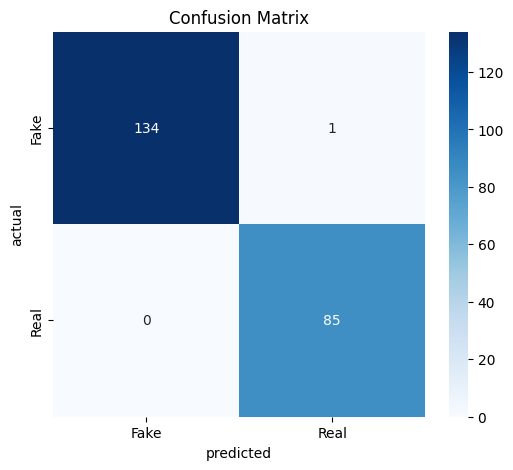

In [55]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

#  plotting the report 
plt.figure(figsize=(6, 5)) # width and heigh in inches
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"]) # heatmap plot in seaborn
# heatmpa plot of seaborn
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show

 Step-7: Prediction System

In [ ]:
def make_prediction(input_data):
    pass

In [ ]:
# example input data for prediction 
# (replace with actual form data or array)
input_data = np.array([[1.5, 2.3, 3.4, 0.7]]) # example data

# get prediction
ressult = make_prediction(input_data)
print(result) # will print "real" or "fake" based on the prediction

Step-9: Save model